<a href="https://colab.research.google.com/github/aakash0812/ConsumerAnalytics/blob/main/Consumer_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_excel('Alibaba-network.xlsx', index_col=0)
print(df)

     1    2    3    4    5    6    7    8    9    10   ...  518  519  520  \
1      0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
5      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
523    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
524    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
525    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
526    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
527    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     521  522  523  524  525  526  527  
1      0    0    0    0    0    0 

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [84]:
G = nx.DiGraph()

In [86]:
for col in df.columns:
  G.add_node(col)

In [89]:
for row in df.index:
  for col in df.columns:
    if df.loc[row,col] ==1:
      G.add_edge(row,col)

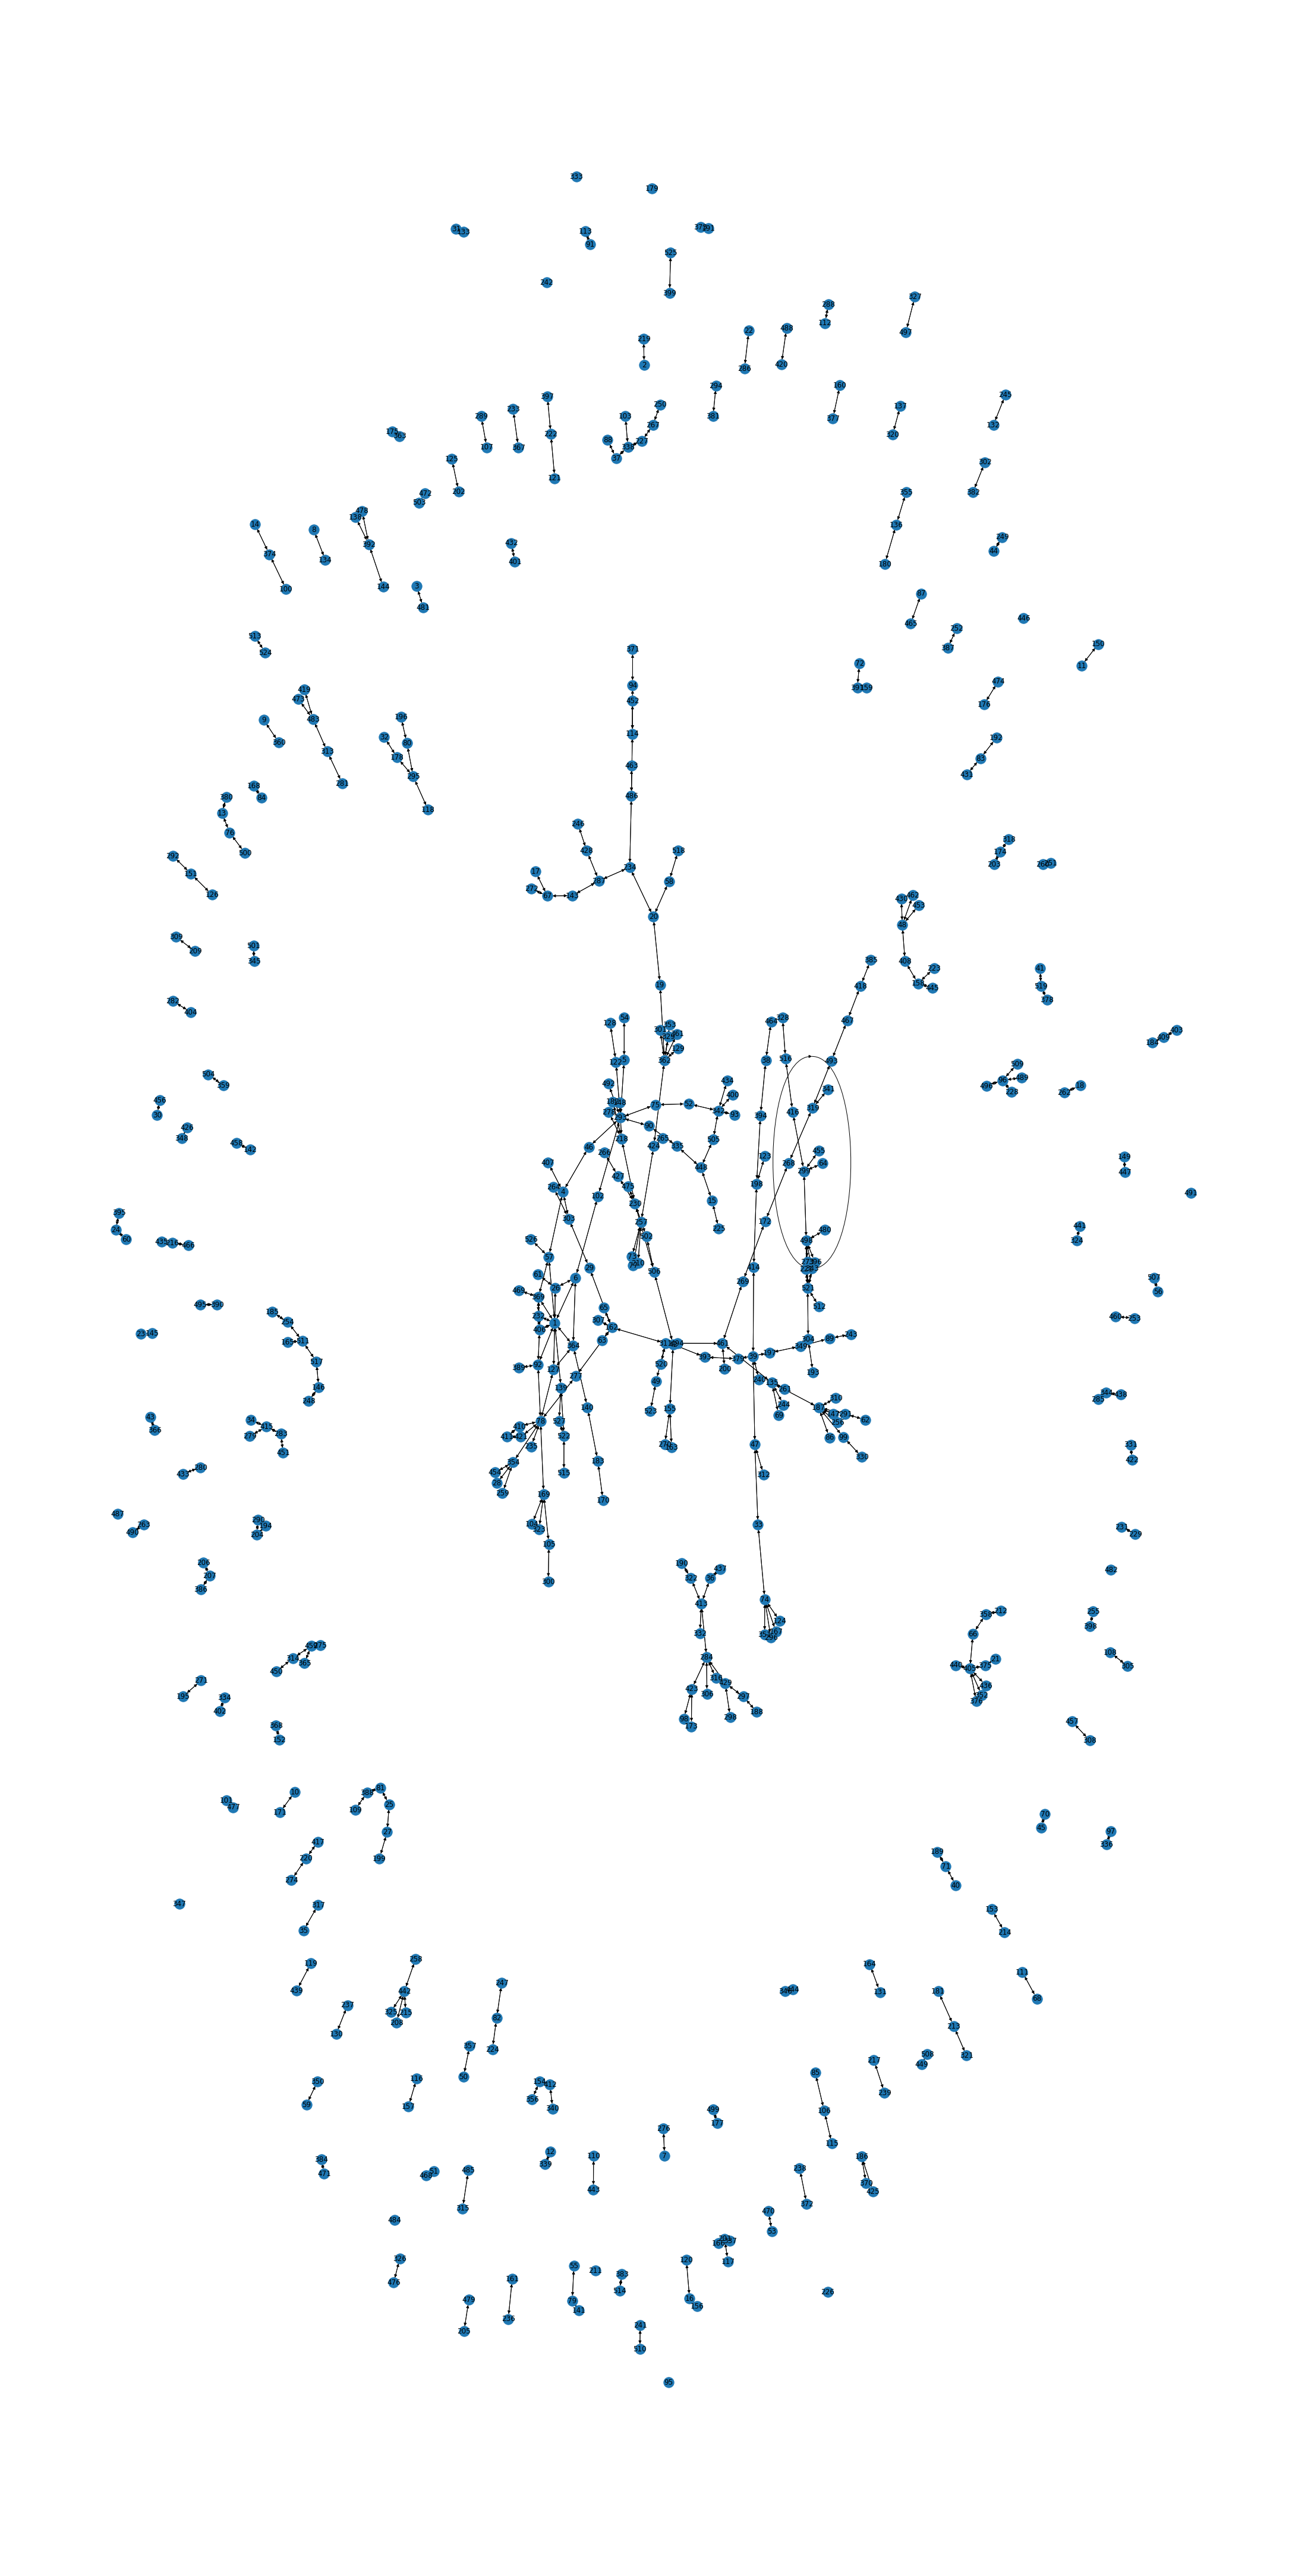

In [118]:
plt.figure(figsize = (30,60))
nx.draw(G, with_labels=True)
plt.show()

In [122]:
nx.average_clustering(G)
#measures the probability of nodes in a graph to cluster together. Low = weak ties

0.04417035631456882

In [130]:
G_Descend = sorted(nx.degree(G), key=lambda x:x[1], reverse=True)
top_ten_degree = G_Descend[:10]
top_ten

#top 10 degree i.e. number of connections a node has

[(1, 20),
 (78, 16),
 (187, 14),
 (293, 14),
 (362, 14),
 (498, 14),
 (521, 14),
 (162, 12),
 (343, 12),
 (405, 12)]

In [155]:
Centrality = nx.degree_centrality(G)
G_Descend_Centrality = sorted(Centrality.items(), key = lambda y:y[1], reverse = True)
top_ten_degree_centrality = pd.DataFrame(G_Descend_Centrality[:10],
                                               columns=["Nodes", "Centrality"])

#degree of centrality top ten

In [156]:
Closeness = nx.closeness_centrality(G)
G_Descend_Closeness = sorted(Closeness.items(), key = lambda z:z[1], reverse = True)
Top_ten_Degree_Closeness = pd.DataFrame(G_Descend_Closeness[:10],columns=["Nodes", "Closeness"]) 
#Closeness top ten

In [157]:
Betweenness = nx.betweenness_centrality(G)
G_Descend_Betweenness = sorted(Betweenness.items(), key = lambda a:a[1], reverse = True)
Top_ten_Degree_Betweenness = pd.DataFrame(G_Descend_Betweenness[:10], columns=["Nodes", "Betweenness"])
#Betweenness top ten

In [159]:
Table = pd.merge(top_ten_degree_centrality, Top_ten_Degree_Closeness, on="Nodes", how = "outer")
Table = pd.merge(Table, Top_ten_Degree_Betweenness, on ="Nodes", how = "outer")
Table

,Nodes,Centrality,Closeness,Betweenness
0,1,0.038023,0.034544,0.007875
1,78,0.030418,0.036059,0.012867
2,187,0.026616,NaN,NaN
3,293,0.026616,NaN,0.010033
4,362,0.026616,NaN,NaN
5,498,0.026616,NaN,NaN
6,521,0.026616,NaN,NaN
7,162,0.022814,0.036459,0.015208
8,343,0.022814,NaN,NaN
9,405,0.022814,NaN,NaN
